In [4]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["figure.figsize"] = [12,12]
#If you have problems with latex at matplotlib just comment next two lines, this might help
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
def fix_scaling(ax=None):
    if not ax:
        xlim = plt.xlim()
        ylim = plt.ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            plt.ylim((ylim[0] - (d1-d2) / 2, ylim[1] + (d1-d2) / 2))
        else:
            plt.xlim((xlim[0] + (d1-d2) / 2, xlim[1] - (d1-d2) / 2))
    else:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            ax.set_ylim((ylim[0] - (d1-d2) / 2, ylim[1] + (d1-d2) / 2))
        else:
            ax.set_xlim((xlim[0] + (d1-d2) / 2, xlim[1] - (d1-d2) / 2))

In [23]:
theta = 1.4
dzeta = 0.2
def func(x):
    return 0.5 * (theta * (x[0] - x[1]) ** 2 + dzeta * (x[0] + x[1]) ** 2)
def f_grad(x):
    return theta * np.array([x[0] - x[1], x[1] - x[0]]) + dzeta * np.array([x[0] + x[1], x[0] + x[1]])

matrix_form = theta * np.array([[1, -1], [-1, 1]]) + dzeta * np.array([[1, 1], [1, 1]])

In [30]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
def animate_trajectory(traj):
    fig, ax = plt.subplots()
    n = len(traj)
    def step(t):
        ax.cla()
        ax.plot([0], [0], 'o', color='green')
        #Level contours
        delta = 0.025
        x = np.arange(-3, 3, delta)
        y = np.arange(-3, 3, delta)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        #print(X.shape, Y.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i][j] = func([X[i][j], Y[i][j]])
        CS = ax.contour(X, Y, Z, [0.5, 1.5, 3], colors=['blue', 'purple', 'red'])

        ax.plot([u[0] for u in traj[:t]], [u[1] for u in traj[:t]], color='black')
        ax.plot([u[0] for u in traj[:t]], [u[1] for u in traj[:t]], 'o', color='black')
        
        fix_scaling(ax)
        ax.axis('off')

    return FuncAnimation(fig, step,
                     frames=range(n), interval=600)

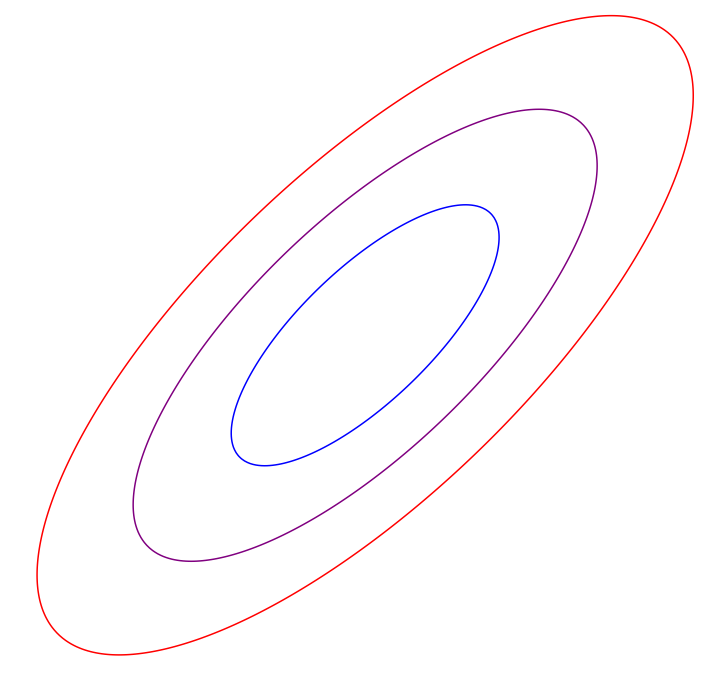

In [24]:
alpha = 0.1
traj = []
x_start = np.array([2, 2.8])
traj.append(x_start.copy())
cur_x = x_start.copy()
for i in range(15):
    cur_x = cur_x - alpha * f_grad(cur_x)
    traj.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory(traj)
HTML(base_animation.to_html5_video())    

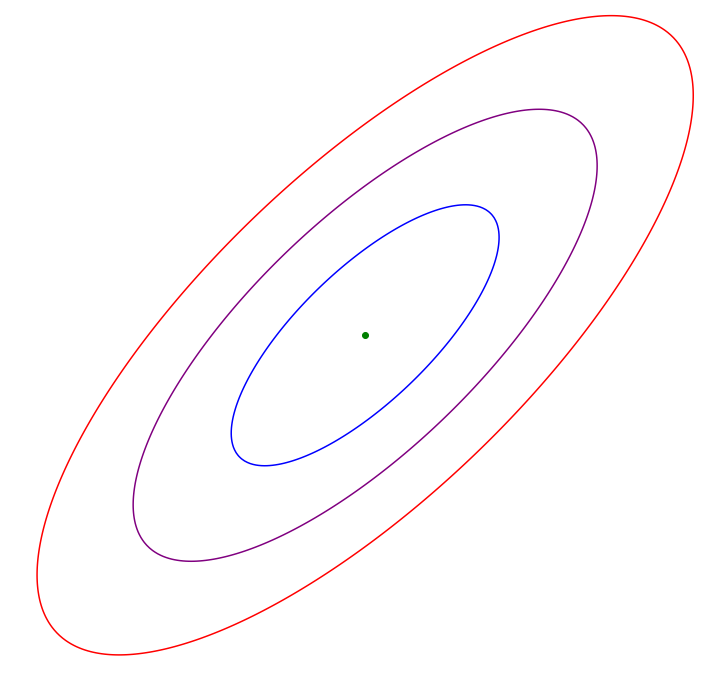

In [57]:
alpha = 2.0 / (sum(list(np.linalg.eig(matrix_form)[0])))
traj_opt_step = []
x_start = np.array([2, 2.8])
traj_opt_step.append(x_start.copy())
cur_x = x_start.copy()
for i in range(15):
    cur_x = cur_x - alpha * f_grad(cur_x)
    traj_opt_step.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory(traj_opt_step)
HTML(base_animation.to_html5_video())    

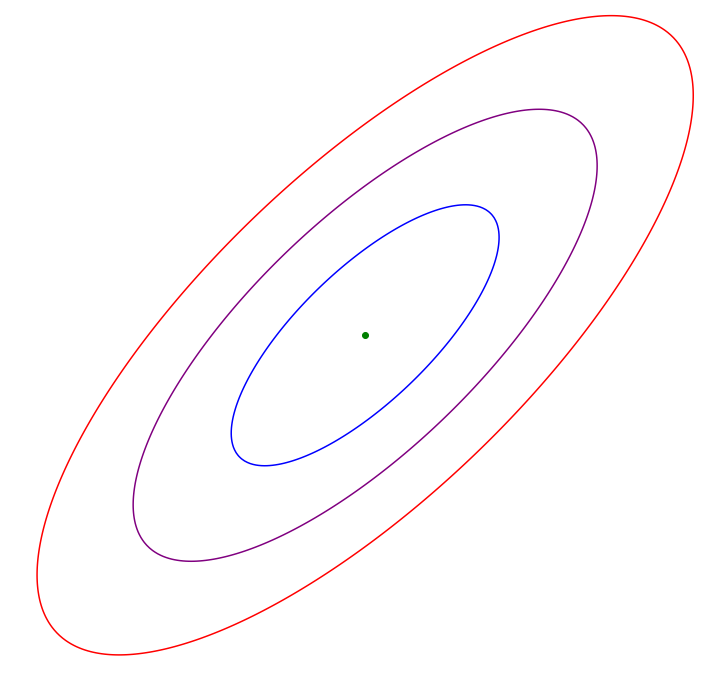

In [31]:
alpha = 1.0 / (max(list(np.linalg.eig(matrix_form)[0])))
traj = []
x_start = np.array([2, 2.8])
traj.append(x_start.copy())
cur_x = x_start.copy()
for i in range(15):
    cur_x = cur_x - alpha * f_grad(cur_x)
    traj.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory(traj)
HTML(base_animation.to_html5_video())  

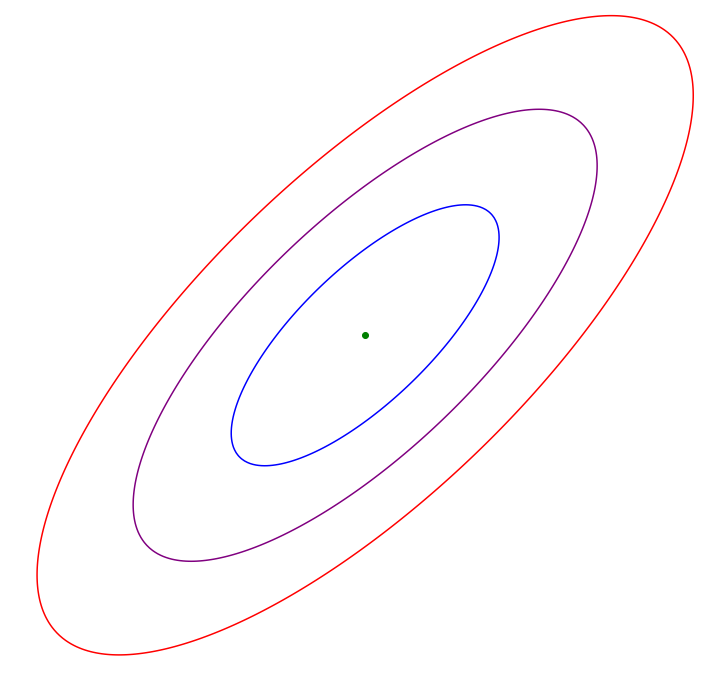

In [35]:
lambdas = list(np.linalg.eig(matrix_form)[0])
traj = []
x_start = np.array([2, 2.8])
traj.append(x_start.copy())
cur_x = x_start.copy()
for i in range(4):
    cur_x = cur_x - 1 / (lambdas[i % 2]) * f_grad(cur_x)
    traj.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory(traj)
HTML(base_animation.to_html5_video()) 

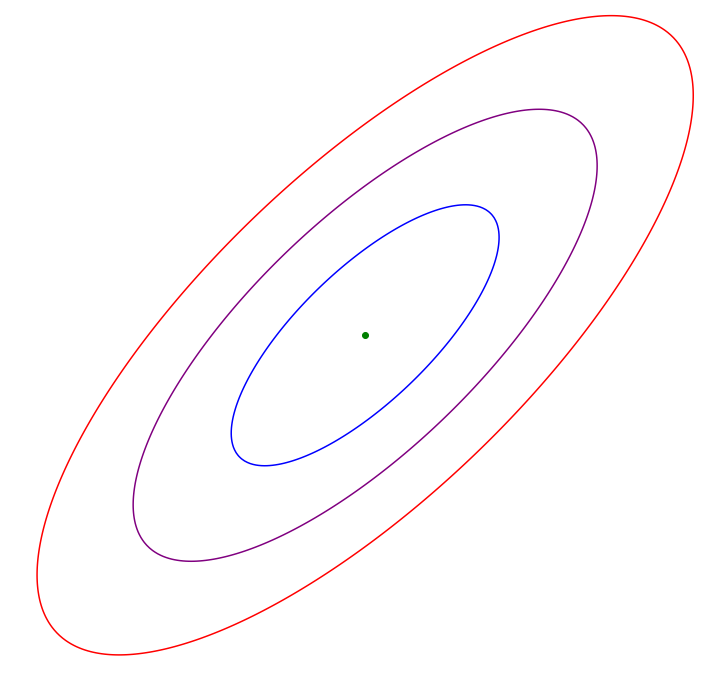

In [58]:
#Heavy ball
alpha = 4.0 / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1])) ** 2
beta = (np.sqrt(lambdas[0]) - np.sqrt(lambdas[1])) / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1]))
traj_heavy_ball = []
x_start = np.array([2, 2.8])
traj_heavy_ball.append(x_start.copy())
cur_x = x_start.copy()
prev_x = x_start.copy()
for i in range(15):
    t = cur_x
    cur_x = cur_x - alpha * f_grad(cur_x) + beta * (cur_x - prev_x)
    prev_x = t
    traj_heavy_ball.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory(traj_heavy_ball)
HTML(base_animation.to_html5_video()) 

0.4514162296451367
phi 1.3333333333333328
gamma 0.521739130434783
gamma 0.46621621621621656
gamma 0.4544524053224159
gamma 0.4520357803824802
gamma 0.4515425149144598
gamma 0.4514419650966203
gamma 0.451421473989184
gamma 0.4514172983223309
gamma 0.4514164474166602
gamma 0.45141627402188444
gamma 0.45141623868808023
gamma 0.4514162314878772
gamma 0.4514162300206442
gamma 0.4514162297216564
gamma 0.45141622966072964


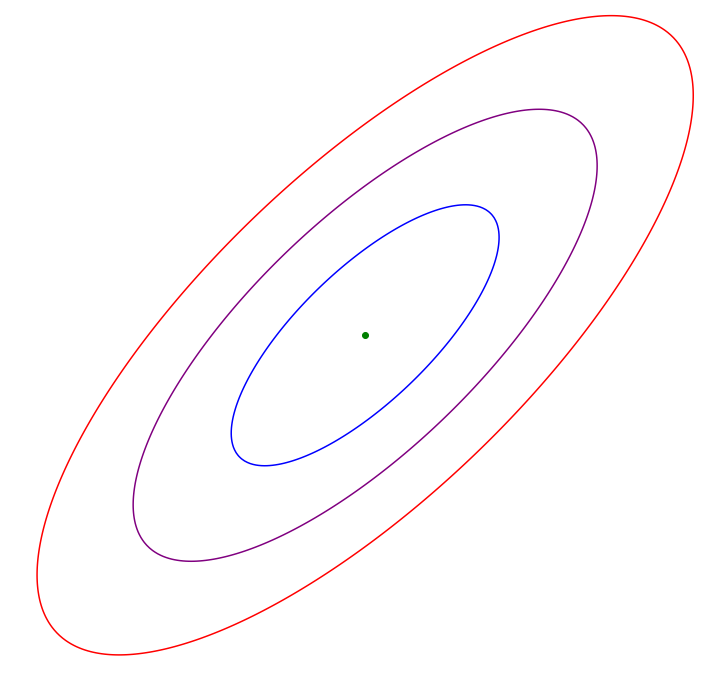

In [63]:
#Chebyshev
phi = (lambdas[0] + lambdas[1]) / (lambdas[0] - lambdas[1])
cur_gamma   = 1.0 / phi
prev_gamma  = 0
print(phi - np.sqrt(phi ** 2 - 1))
print('phi', phi)
traj_chebyshev = []
x_start = np.array([2, 2.8])
traj_chebyshev.append(x_start.copy())
cur_x = x_start.copy()
prev_x = x_start.copy()
for i in range(15):
    t = cur_x
    alpha = 4 * cur_gamma / (lambdas[0] - lambdas[1])
    beta = cur_gamma * prev_gamma
    cur_x = cur_x - alpha * f_grad(cur_x) + beta * (cur_x - prev_x)
    prev_x = t
    t = cur_gamma
    cur_gamma = 1.0 / (2 * phi - cur_gamma)
    prev_gamma = t
    print('gamma', cur_gamma)
    traj_chebyshev.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory(traj_chebyshev)
HTML(base_animation.to_html5_video()) 

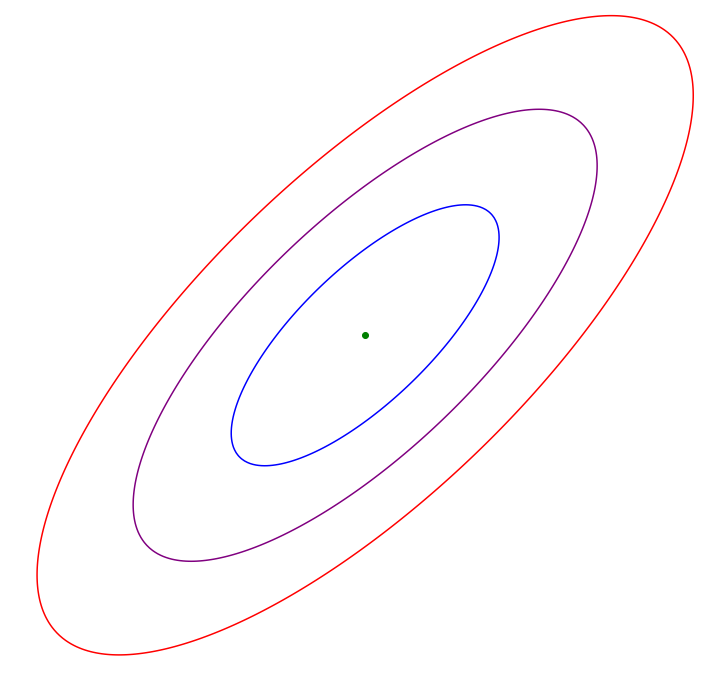

In [62]:
#Nesterov
alpha = 1 / (lambdas[0] + 1)
beta = (np.sqrt(lambdas[0]) - np.sqrt(lambdas[1])) / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1]))
traj_nesterov = []
x_start = np.array([2, 2.8])
traj_nesterov.append(x_start.copy())
cur_x = x_start.copy()
cur_y = x_start.copy()

for i in range(15):
    t = cur_x
    cur_x = cur_y - alpha * f_grad(cur_y)
    cur_y = cur_x + beta * (cur_x - t)
    traj_nesterov.append(cur_x.copy())
    
base_animation = animate_trajectory(traj_nesterov)
HTML(base_animation.to_html5_video()) 

(16, 2)
(16, 2)
(16, 2)
(16, 2)
(16, 2)


[]

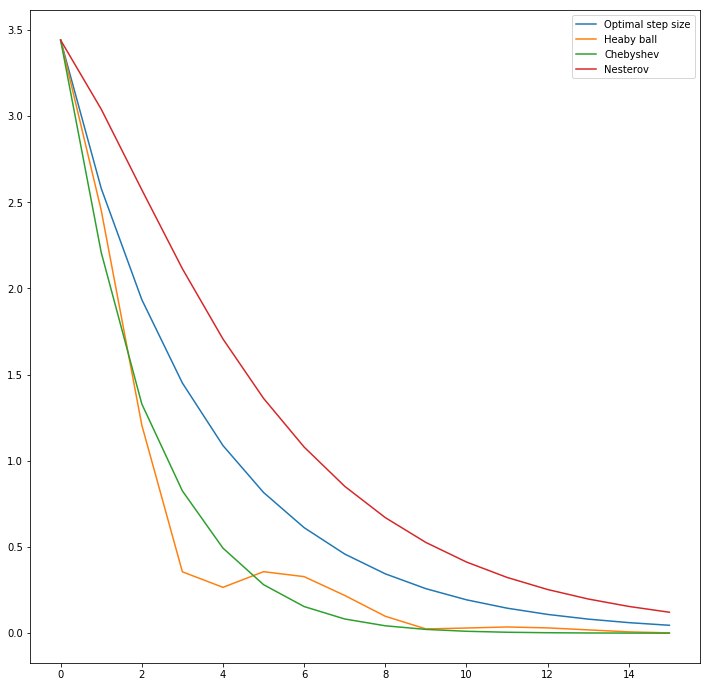

In [65]:
fig, ax = plt.subplots()
u = np.array(traj_opt_step)
ax.plot(range(16), [np.linalg.norm(t) for t in u], label='Optimal step size')
u = np.array(traj_heavy_ball)
ax.plot(range(16), [np.linalg.norm(t) for t in u], label='Heaby ball')
u = np.array(traj_chebyshev)
ax.plot(range(16), [np.linalg.norm(t) for t in u], label='Chebyshev')
u = np.array(traj_nesterov)
ax.plot(range(16), [np.linalg.norm(t) for t in u], label='Nesterov')
plt.legend()
plt.plot()